# Observational Causal Inference Simulation : Sensitivity Analysis for confounder-control studies

*If you see any errors (or suggestions) below, feel free to let me know!*

## Table of Contents

## Introduction

When performing observational causal inference, regardless of the method, you will rely on untestable assumptions. However, causal inference is valuable because otherwise we heavily limit our ability to make causal statements (limited to A/B tests and other experimental studies). A lot of important changes that has occured in our society has been due to observational causal inference, such as studying the effect of smoking on lung cancer.

Different untestable assumptions exist for different methods. For example, in instrument-based methods, you can't actually "prove" that something is an instrument (although in some situations you *can* create natural instruments like through an A/B test, which can make instrument-based methods an attractive part of your causal inference arsenal ([Bojinov, Chen, and Liu, 2020](https://hdsr.mitpress.mit.edu/pub/wjhth9tr/release/3))). For confounder-control methods like Matching, where you have to include all confounders into your model that needs to be controlled for, you can't prove that this was done successfully. In other words, you cannot prove that you have closed all backdoor paths. Instead, you have to reason and have your audience agree that you have controlled for enough variables and that what you have controlled for is sufficient for fulfilling the causal identification assumptions.

Sensitivity analyses is a developing field of causal inference that aims to relieve a bit of frustration from these untestable assumptions as it tries to figure out how strong (or how much) the hidden confounding would have to be to change your effect estimate.

## The first sensitivity analysis

The first instance of sensitivity analysis in causal inference is attributed to Jerome Cornfield and others in a paper in 1959. This fascinating story is documented in many places, but the place I first encountered it was in Judea Pearl's The [Book of Why](https://www.goodreads.com/en/book/show/36204378).

Pearl tells of the tragedy of the famous statistician R.A Fisher, often referred to as the father of modern statistics. He was a heavy smoker and was always critical of all the causal work being done on the effect of Smoking on Lung Cancer. To his credit, it is true that earlier causal methods had more flaws to poke, and there was always that uncertainty that there was a confounder that people were not controlling for. Fisher claimed that Smoking and Lung cancer was a spurious correlation, and that there was a "smoking gene" that caused people to smoke more often as well as causing lung cancer more often, therefore you could not conclude that smoking caused cancer.

Cornfield and his colleagues published a paper in 1959 that most people consider to have put an end to the multi-year long conversation. Cornfield showed that for there to be this gene that completely explains away the correlation between smoking and cancer, the gene would have to be 9x more prevelant in smokers than non-smokers. Upon hearing that, most biologists of that time found that to be ludicrous. A few years later, the US Surgeon General made a definitive causal statement to the public regarding the effect of Smoking on Cancer, and since then, smoking has been on a sharp decline.

## A quick overview of sensitivity analyses that will be covered in this notebook

In the original sensitivity analysis by Cornfield et al., they made the following assumptions or limitations ([Ding and VanderWeele, 2016](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4820664/)):
1. there is a single binary unmeasured confounder
2. no interaction between the effects of the exposure and the outcome
3. tests for null hypothesis of no causal effect

Since then, there have been several new methods for increased flexibility. Some methods try to simplify the process more, some try to relax more assumptions, and some try to improve the interpretability. We'll be looking at papers that include scholars such as Rosenbaum, Cinelli, Hazlett, and McGowan, but there are many many more that is not covered here.




## A brief note on confounder selection

It only makes sense to discuss briefly on how confounder selection is performed before discussing evaluating those choices (via sensitivity analysis).

You'll notice that when reading causal inference papers throughout the years, the message on confounder selection can feel a bit conflicting.

For instance, in *Why Propensity Scores Should Not Be Used for matching* ([King and Nielsen, 2019](https://gking.harvard.edu/sites/scholar.harvard.edu/files/gking/files/pan1900011_rev.pdf)), it claims that a reasonble way to satisfy the ignorability assumption is to include in $X$ any variable known to affect either $Y$ or $T$ (the treatment variable), since "*if any subset of these variables satisfies unconfoundedness, this set will too*" and references *A New Criterion for Confounder Selection* ([VanderWeele and Shpitser, 2011](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3166439/)).

One can also find in some text that recommend that you should control for as many variables (pre-treatment) as possible, because measured confounders may be correlated with a lot of unmeasured confounders, thus indirectly controlling for them.

On the other hand, proponents of Causal Graphs such as Judea Pearl have noted (in various places, including in his ["The Book of Why"](https://en.wikipedia.org/wiki/The_Book_of_Why)) that this can lead to biased estimates because controlling for certain variables can actually corrupt your estimates, in what he calls an $M$-bias.

In a more recent work by VanderWeele, *Principles of Confounder Selection* ([VanderWeele, 2019](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6447501/)), it is recommended that when looking for confounders, we use the following guidelines:
1. Control for which covariate that is a cause of the exposure, or of the outcome, or both
2. Exclude from this set any variable known to be an instrumental variable
3. Include as a covariate any proxy for an unmeasured variable that is a common cause of both the exposure and the outcome

The guidelines so far in the text above just seem like "guidelines", and one may wonder, are there any statistical methods, such as with feature selection methods in predictive modeling?

In the same paper, VanderWeele discusses that while there are statistical methods for confounder selection, it is limiting as it often relys on strong assumptions and that it is inadequate when only relying on statistical methods as statistics can have a difficult time assessing temporal order of variables.

In other words, data-driven approaches do not obviate the need for substantive knowledge in confounder selection decisions, even though they are sometimes presented as stand-alone alternatives. Some examples of statistical methods include backward and forward selection, change-in-estimate, high dimensional propensity scores, targeted maximum likelihood estimation, etc.

## Rosenbaum's methods (2005)

[Rosenbaum, 2005](http://www-stat.wharton.upenn.edu/~rosenbap/BehStatSen.pdf) demonstrates some practical examples of sensitivity analysis for causal inference in observational studies. More specifically, he provides an example that directly extends Cornfield's work from 1959. He explains that Cornfield et al. had relied on a sensitivity analysis that utilized some assumptions such as binary response. In addition, Cornfield ignored sampling variability, which is a crucial aspect of inference. Perhaps the reason he was able to avoid it is because his results were so strong that it seemed unlikely to all that it could be explained by chance. In Rosenbaum's text linked above, he utilizes $p$-values and gives an example of sensitivity analysis with continuous outcomes (ofcourse, sensitivity analysis that uses binary outcomes and $p$-values exist, but he does not cover it in this specific article). In addition, he claims that this test is highly suitable for matched data, which may not be true for all sensitivity analysis methods.

Rosenbaum's sensitivity analysis imagines that in the population before matching, subjects are assigned to treatment or control independently with unknown probabilities. Specifically, two subjects who look the same at baseline before treatment (i.e., two subjects with the same observed covariates) may differ in terms of unobserved covariates, so that one subject has an odds of treatment that is up to $\Gamma\geq 1$ times greater than the odds for another subject. In a randomized experiment, everyone has $\Gamma=1$. The sensitivity analysis asks *how much hidden bias can be present - that is, how large can $\Gamma$ be, before the qualitative conclusions of the study begin to change*.

The larger the $\Gamma$ needs to be to change the study's conclusion, the more insensitive the results are to unobserved confounders.

For each value of $\Gamma>1$, we compute an interval of $p$-values to see how big $\Gamma$ would had to have been for us to have not rejected the null hypothesis.

For his example of continuous outcomes, he relies on Wilcoxon's Signed Rank test.



The strength of this method is that it is easy to compute (with Rosenbaum's R package, anyway) and $\Gamma$ makes sense intuitively. However, there is no benchmark for what $\Gamma$ value is acceptable as it depends on the causal analysis being performed. For example, if someone said that their $\Gamma = 3$, how does one respond? Thus, the usefulness of this sensitivity analysis can be contested.

In addition, in other papers, it clarifies the exact assumptions that this method uses which may make the anlaysis not feel as strong.

This method can be implemented in several packages, with one being in the package [rbounds](https://cran.r-project.org/web/packages/rbounds/rbounds.pdf). This package appears to include quite a number of methods, including:
- methods for binary outcome (using Fisher's exact test)
- methods suited for IV methods (causal inference methods that utilize instrumental variables, as opposed to, for instance, matched pairs)
- methods that calculate new point estimates
- etc.,

Another note - while I'm not able to make this claim confidently, one caveat of this older test seems to be that the wilcoxon sign rank test doesn't actually test for the average treatment effect, instead, it measures if observations in treatment tend to be lower or greater. This may be why in Rosenbaum's future work, he uses the permutational $t$-test.

## Rosenbaum's methods (2015)

We will now briefly review Rosenbaum's [vignette](http://www-stat.wharton.upenn.edu/~rosenbap/packpaper.pdf) for sensitivity analysis and will include notes and key quotes from the vignette. This is also the only section of this notebook that will have *math*. I skipped it for other sections but thought it would be good to have it for at least one.

There appears to be two similar packages at play:
- `sensitivitymw`: faster, but limited to 1:1 matched pairs or matched sets with 1 treated and a fixed number, $K\geq2$, of controls (meaning that every treated unit needs to match with exactly $K$ controls).
- `sensitivitymv`: for matched sets with variable number of controls

In addition, the package offers conventional statistics, such as the permutational $t$-test and $M$-statistics using Huber's weights, but also higher power test statistics that are less familiar.

In an observational study, treated and control subjects may be matched to be similar in terms of observed or measured covariates, but people who look similar in terms of measured covariates may still differ in terms of unmeasured covariates. The packages perform a sensitivity analysis asking about the magnitude of bias from nonrandom treatment assignment that would need to be present to alter the qualitative conclusions of a naive analysis that presumes matching for observed covariates removes all bias.

We'll cover the math for just the first part of his article, regarding using permutational $t$-tests for matched pairs. He gives similar examples of other tests that are less well-known, although he doesn't strictly give guidelines on when to use which.

### permutational $t$-test for matched pairs

First, a quick review of permutational $t$-tests:

A permutation test is a nonparametric test, and thus a statistical test that doesn't make assumptions about the distribution of the data. It is useful when the usual assumptions of a t-test wouldn't be met. But like the $t$-test, it is a comparison of means.

Now, back to Rosenbaum's article...

**Some Notation**:
- $I$ matched sets: $i=1,...,I$
- $n_i$ subjects in each set $i$: $j=1,...,n_i$ (in treatment-control pairs, $n_i=2$ because two subjects per set, while $n_i=K+1$ for matching every treated subject to $K$ controls.

So, the statement $n_1 = 2$ means that for the 1st matched set, there are 2 subjects.

- one subject in each set is treated, $Z_{ij}=1$
- the others are untreated controls, $Z_{ij}=0$

Thus, $1=\sum_{i=1}^{n_i}Z_{ij}$ for each matched set $i$, because we're assuming here that we match 1 treated with any number of applicable controls. This is typically the popular convention in a lot of literature because in many studies, especially in epidemiology, it's always very few treatment and a large number of control, and the ATT is typically the estimand of interest.

The $j$th subject in set $i$ would exhibit response value $r_{T_{ij}}$ if assigned to treatment with $Z_{ij}=1$ or response $r_{C_{ij}}$ if assigned to control with $Z_{ij}=0$, so each subject actually exhibits response $R_{ij}=Z_{ij}r_{T_{ij}}+(1-Z_{ij})r_{C_{ij}}$ and ofcourse the effect of treatment on an *individual* subject, namely $r_{T_{ij}}-r_{C_{ij}}$, is not observed, due to the *fundamental problem of causal inference*.

Fisher's (1935) null hypothesis $H_0$ of no treatment effect asserts that $r_{T_{ij}}=r_{C_{ij}}$ for all $i,j$.

The treatment has additive shift (i.e., constant effect) if $r_{T_{ij}}-r_{C_{ij}}=\tau$ for all $i,j$. It is a constant effect as the value of $\tau$ is true for all $i,j$.

First, let's work with the case of $n_i=2$ for all $i$.

The treated-minus-control pair difference in outcomes is:
$$Y_i=(Z_{i1}-Z_{i2})(R_{i1}-R_{i2})$$

Since the sum of all $Z$'s for each set $i$ is 1, the above is just equivalent to the difference between person 1 and person 2 in each pair, which we can see below.



If the treatment has an additive effect $\tau$, then $Y_i=\tau+\epsilon_i$, where:
$$\epsilon_i=(Z_{i1}-Z_{i2})(r_{C_{i1}}-r_{C_{i2}})=\pm|r_{C_{i1}}-r_{C_{i2}}|$$

The reason why isn't not just $Y_i = \tau$ is because even within each group, you will have differences since not everyone is the same. That explains $\epsilon_i=\pm|r_{C_{i1}}-r_{C_{i2}}|$, which is what the difference would be if both persons in each pair were exposed to Control. This would show what the difference is outside of the treatment effect.

Therefore, under Fisher's null hypothesis $H_0$, of no effect, the pair difference is $Y_i=\epsilon_i$.

In a randomized experiment (as opposed to an observational study like ours), the permutational $t$-test is the randomization test that uses as its test statistic either the:
- the total, $T=\sum_{i=1}^{I}Y_i$
- the mean, $T=\frac{1}{I}\sum_{i=1}^{I}Y_i$

(remember that $I$ is the number of pairs.)

These two statistics give the same permutational $p$-value. The permutation distribution of the mean, or the permutational $t$-test, is of historical and conceptual importance, in part because, in a randomized experiment, the expectation of $T=\frac{1}{I}\sum_{i=1}^{I}Y_i$ is the average treatment effect, $E(T)=\frac{1}{2I}\sum_{i=1}^{I}\sum_{j=1}^{2}(r_{T_{ij}}-r_{C_{ij}})$


### an example

The example from the paper works with a small sample size of 39 (pairs). It is data regarding welders and their exposure to chromium and nickel (the "exposure") and the outcome is DNA damage, a continuous variable. Confounders matched for were age and smoking habits.

In a null hypothesis of of no treatment effect, Rosenbaum shows that the permutational $t$-test gave a one-sided $p$-value of $2.048\times10^{-5}$. This was computed using the unadjusted bias value of $\Gamma=1$, using the same concept as from Rosenbaum, 2005.

The $p$-value exceeds $\alpha=0.05$ at around $\Gamma=4$. Thus, "*$p$-values well below and slightly above the conventional $0.05$ level are possible under $H_0$ if the bias could be as large as $\Gamma = 4$*". In other words, rejection of $H_0$ is sensitive to unmeasured biases of magnitude $\Gamma=4$.

The code is straightforward:

```R
>library("sensitivity")
>data(erpcp)
# Computes p-value at Gamma = 1
>senw(erpcp,gamma=1,method="t")$pval
# Computes p-value at Gamma = 4
>senw(erpcp,gamma=4,method="t")$pval
```

Instead of the $p$-values, you can also compute the confidence interval of the point estimate (treatment effect estimate) instead:
```R
>senmwCI(erpcp, gamma=1, method="t", one.sided=TRUE)
$PointEstimate
minimum maximum
0.5739   0.5739
$Confidence.Interval
minimum maximum
0.394    Inf
```

This returns the min and max of the point estimate based on $\Gamma$ (in the above, the min and max is the same because $\Gamma=1$, thus equivalent to `mean(erpcp$welder-erpcp$control)`.

The default is a 0.05-level for the one-sided confidence interval, thus explaining the confidence interval values.

When using $\Gamma=2$, the following result shows:
```R
> senmwCI(erpcp, gamma = 2, method = “t”, one.sided = TRUE)
$PointEstimate
minimum maximum
0.4167 0.7487
$Confidence.Interval
minimum maximum
0.2081 Inf
```

This implies , if there existed an unmeasured biases of magnitude $\Gamma=2$, we would have still rejected the null hypothesis.

### Amplification: an aid to interpreting $\Gamma$

Recall that the interpretation of $\Gamma$ has been that sensitivity analysis reports the range of possible inferences when an unobserved bias alters the *odds of treatment* by a factor of at most $\Gamma$, and the extremes of that range are produced by a bias strongly related to the outcome.

An amplification interprets the single parameter $\Gamma$ in terms of two parameters:
- $\Lambda$: controlling the relationship between the unobserved bias and *treatment assignment* $Z_{ij}$.
- $\Delta$: controlling the relationship between the unobserved bias and the *outcome* $Y_i$.

A bias of $\Gamma$ is equivalent to the curve defined by:

$$\Gamma=\frac{(\Lambda\Delta+1)}{(\Lambda+\Delta)}$$

This means that one can calculate and report using one parameter $\Gamma$ but have available the equivalent interpretations involving two parameters $(\Lambda,\Delta)$.

The code:
```r
> library(sensitivitymv)
> amplify(3, c(4 : 7))
  4     5    6   7
11.00 7.00 5.67 5.00
```

The code is taking a scalar $\Gamma>1$ (in this case, $\Gamma=3$) and a vector of $\Lambda$'s and computes the corresponding vector of $\Delta$'s. As an example, this says that a $\Gamma=3$ is equivalent to $(\Lambda,\Delta)=(7,5)$

Another note, as one of $\Delta$ or $\Lambda$ approach infinity, the other approaches $\Gamma$. So essentially, what this means is that previously, we were noting the bias on how the unobserved confounder affects treatment. By doing so, we had just assumed that the effect the unobserved confounder can have on the outcome is infinite, so we were thinking of the worst case scenario, to be conservative (and careful) with our sensitivity analysis.

## McGowan, 2022

The following text covers a bit from ([McGowan, 2022](https://link.springer.com/article/10.1007/s40471-022-00308-6)).

McGowan's paper linked above looks like it's intended to be a comprehensive review of the existing sensitivity analysis methods. Thus, she covers a bit of many different contributors, including one we'll cover later, by Cinelli and Hazlett.

She covers 3 different types of sensitivity analysis.
1. We know a bit about the hidden confounder$\rightarrow$treatment effect
2. We know a bit about the hidden confounder$\rightarrow$outcome effect
3. We know nothing about the hidden confounder, if there are any

I'll cover the 3rd one because I believe that's the most common (or at least it has been for me in the workplace). Below we'll talk about "tipping point" analysis, which is stating how strong the confounder would have to be to change our estimate, using inputs and outputs that are familiar. This is actually pretty similiar intuitively to Rosenbaum's work. But this time we'll have our own data.

These are available in her `tipr` package. Some examples are here: ([Github link](https://github.com/r-causal/tipr))

First, let's simulate some data:

### Load Libraries

In [2]:
# all Python libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.special import expit
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Load R
# Guide here: https://colab.research.google.com/drive/1ISG891i076enSPB-4bni_DECWlFlnasU?usp=sharing
%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'

In [5]:
%%R
#install.packages("tipr")
#install.packages("sensemakr")

NULL


In [8]:
%%R
library('tipr')
library('sensemakr')

### Simulate some data

In [103]:
# sample size
n = 30000

# define covariates
w1 = np.random.normal(0,1,n)
w2 = np.random.normal(0,1,n)

# treatment
a = np.random.binomial(1,expit((w1+w2)/2),n)

# outcome
e = np.random.normal(0,1,n)
y = -2*a+10*w1+10*w2+e

# put into a pandas dataframe
d = {'y':y, 'a':a, 'w1':w1, 'w2':w2}
df = pd.DataFrame(data=d)

### apply tipping point analysis

In [104]:
%%R -i df
summary(lm(y~a+w1,data=df))$coef

             Estimate Std. Error   t value      Pr(>|t|)
(Intercept) -2.432077 0.08065895 -30.15260 8.622032e-197
a            2.815317 0.11530461  24.41634 2.154722e-130
w1           9.503464 0.05737686 165.63235  0.000000e+00


Note here that the actual effect is $-2$, but when you don't include both confounders and only include one of them, the treatment effect is $2.\#$. Let's continue and pretend that $w_2$ is an unobserved (hidden) confounder.

To check if there is an unmeasured confounder (continuous in this case), let's first look at the mean of the unmeasured confounder in each group.

I think the tipping analysis demands a "scaled mean difference", but we don't have to do that in our simulation because all our confounders are normally distributed around mean 0 and variance 1 to make our analysis easier.

In [105]:
print('mean in treated:', df[df.a==1]['w2'].mean())
print('mean in control:', df[df.a==0]['w2'].mean())
print('difference:',df[df.a==1]['w2'].mean() - df[df.a==0]['w2'].mean())

mean in treated: 0.22775183693308385
mean in control: -0.2305914312336023
difference: 0.45834326816668614


In [108]:
%%R
tip(effect_observed = 2.5, exposure_confounder_effect = 0.45)

with the following specifications:
  * estimated difference in scaled means between the unmeasured confounder
    in the exposed population and unexposed population: 0.45
  * estimated relationship between the unmeasured confounder and the outcome: 7.66





# A tibble: 1 × 5
  effect_adjusted effect_observed exposure_confounder_e…¹ confounder_outcome_e…²
            <dbl>           <dbl>                   <dbl>                  <dbl>
1               1             2.5                    0.45                   7.66
# ℹ abbreviated names: ¹​exposure_confounder_effect, ²​confounder_outcome_effect
# ℹ 1 more variable: n_unmeasured_confounders <dbl>


The above result tells us that our result would flip if we had an unmeasured confounder with the strength of $7.66$.

This makes sense intuitively because based on how we defined our linear model, the unmeasured confounder that we didn't include, $w_2$ that has a strength of 10, it turns the treatment effect from $2.\#$ to $-2$.

Also important note - the smaller the "confounder$\rightarrow$exposure effect" is, the bigger the "confounder$\rightarrow$outcome effect" has to be to meaningfully change your results. Therefore, if your causal question happens to involve two naturally well-balanced users, it'll take stronger confounder-outcome effects to change your results.

In [102]:
%%R -i df
summary(lm(y~a+w1+w2,data=df))$coef

                 Estimate  Std. Error       t value  Pr(>|t|)
(Intercept)  1.418935e-05 0.008402274  1.688751e-03 0.9986526
a           -1.997059e+00 0.012189995 -1.638277e+02 0.0000000
w1           1.000714e+01 0.005904402  1.694861e+03 0.0000000
w2           1.000184e+01 0.005922917  1.688667e+03 0.0000000


There's more examples from McGowan here: ([GitHub link](https://github.com/r-causal/tipr)), but there's different modifications such as binary confounder, checking for multiple confounders, binary outcomes, etc.

## Cinelli and Hazlett, 2020

Cinelli and Hazlett's paper is interesting because it's the first and (maybe only) sensitivity analysis I've encountered (*so far*) that aims to make the strength of unobserved confounding more interpretable by making it in relation to your observed confounders.

Let's simulate some data again:

### simulate data

In [144]:
# sample size
n = 30000

# define covariates
w1 = np.random.normal(0,1,n)
w2 = np.random.normal(0,1,n)

# treatment
a = np.random.binomial(1,expit((w1+w2)/2),n)

# outcome
e = np.random.normal(0,1,n)
y = 2*a+2*w1+2*w2+e

# put into a pandas dataframe
d = {'y':y, 'a':a, 'w1':w1, 'w2':w2}
df = pd.DataFrame(data=d)

### apply sensitivity

In [148]:
%%R -i df
print('y~a')
print(summary(lm(y~a,data=df))$coef['a',])
print('y~a+w1')
print(summary(lm(y~a+w1,data=df))$coef['a',])

[1] "y~a"
    Estimate   Std. Error      t value     Pr(>|t|) 
  3.83672519   0.03306696 116.02898214   0.00000000 
[1] "y~a+w1"
    Estimate   Std. Error      t value     Pr(>|t|) 
  2.95787800   0.02599144 113.80201477   0.00000000 


In [160]:
%%R
cinci.sensitivity <-
sensemakr(model=lm(y~a+w1,data=df), #our lm model
          treatment='a', #treatment
          benchmark_covariates='w1',
          kd=1:7,
          ky=1:7,
          q=1,
          alpha=0.05,
          reduce=TRUE)

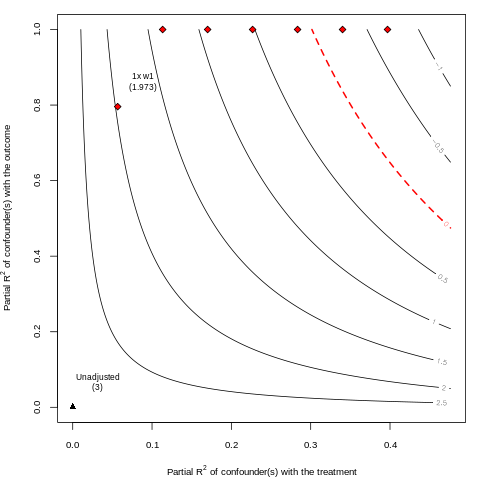

In [161]:
%%R
plot(cinci.sensitivity)

This graph says that to flip our estimate (so across the red dotted line), our confounder would need to be 6x stronger than $w_1$. Since you know a bit about $w_1$ since you observed and measured it, you can reason if it is likely that a confounder could be 6x stronger than $w_1$.

## Conclusion and Final thoughts

We covered a wide range of sensitivity analyses, but my focus was actually on intuition and not on breadth or depth. For both of those, reading the paper themselves would be the most beneficial. We also only covered the math (briefly) of only one of the methods, and there was a lot of content we skipped. For instance, Cinelli and Hazlett's paper contains other measures of sensitivity analysis (including a one-number-summary which they call the Robustness Value) as well as skipping some of Rosenbaum's hypothesis tests that he proposed.

It's also worth pointing out that sensitivity analysis is still a developing field and there's no "general" method that works for all causal inference. For example, for the recent method above from Cinelli and Hazlett, there's no guidance on how they can work for matched datasets (it seems to only work for regression datasets), and how they work for generalized linear models is also unclear (e.g., logistic regression). So when I had binary outcomes, instead of using a logistic regression model (glm with logit link), I used lm(), which corresponds to a linear probability model, and it isn't clear how suitable that is for his method.

Here's also a final quote from Noah Greifer to conclude the notebook:
>I think this paper ([McGowan, 2022](https://link.springer.com/article/10.1007/s40471-022-00308-6)) does a good job of explaining the current best practices. IMO the problem hasn't been fully solved but we're moving in the right direction (i.e., toward a fully general, method-agnostic method of assessing sensitivity